<a href="https://colab.research.google.com/github/Gabriela2685/Simulacion2/blob/main/MH_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metropolis-Hastings 1D
A continuación se generan 3 muestras de 3 distribuciones distintas:


*   Distribución de Cauchy
*   Distribución exponencial
*   Distribucion log-normal

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Distrubición de Cauchy

Parámetros
$X_0 \in \Re$ y $\gamma > 0$

Función pdf
$\frac{1}{\pi\gamma[1+(\frac{x-x_0}{\gamma})^2]}$

In [101]:
def f(x, gamma, x0):
    return np.where(np.isfinite(x),
                    1 / (np.pi * gamma * (1 + ((x - x0) / gamma) ** 2)),
                    0)  # Para valores no válidos, devuelve 0

In [102]:
# Parametros
x0 = 0.2
gamma = 0.1

In [103]:
delta = 0.8

In [104]:
n = 50000  # n tiene que ser muy grande
x = np.zeros(n)
x[0] = 0  # Valor inicial
acept = 0

for i in range(0,n-1):
  y = x[i] + np.random.uniform(-delta,delta)
  if np.random.rand()<min(1,f(y,gamma,x0)/f(x[i],gamma,x0)):
    x[i+1]=y
    acept += 1
  else:
    x[i+1] = x[i]
print("La aceptacion fue del", acept/n*100,"%")

La aceptacion fue del 37.498 %


<ipython-input-96-50fbadadd00e>:2: RuntimeWarning: invalid value encountered in log
  return np.where(x >= 0, (1/(x*sigma*np.sqrt(2*np.pi)))*np.exp(-((np.log(x)-mu)**2)/(2*sigma**2)), 0) #pdf


Text(0.5, 1.0, 'Distribución de Cauchy')

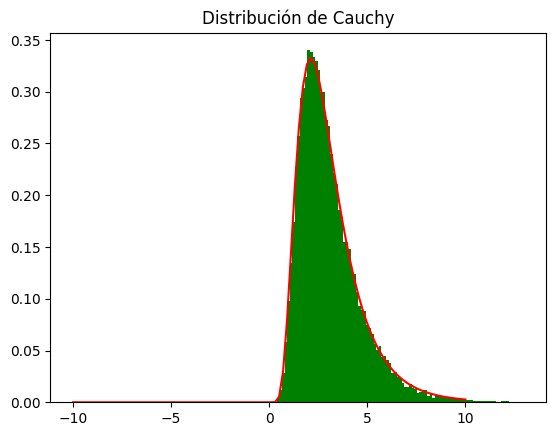

In [100]:
# Histograma
plt.hist(x,density = True, bins=100, color='green')
xs = np.linspace(-10,10,100)
plt.plot(xs,f(xs,gamma,x0), color='red')
plt.title('Distribución de Cauchy')

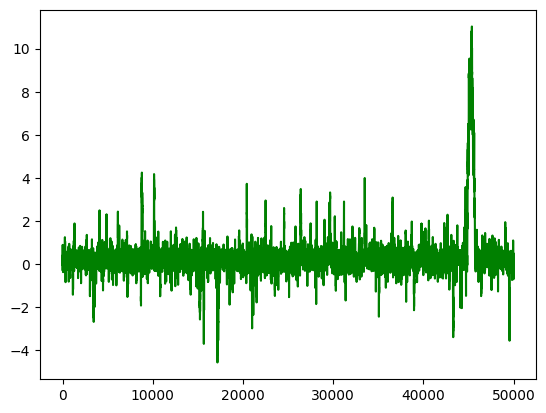

In [7]:
plt.plot(x, color='green')

#Distribución exponencial

Parámetro $\lambda>0$

Finción pdf $\lambda e^{-\lambda x}$

Calculo de media y varianza con $\lambda=0.5$:

$\mu =\frac{1}{\lambda}=\frac{1}{0.5}=2$

$\sigma=\frac{1}{\lambda^2}=\frac{1}{0.5^2}=4$

In [124]:
def f(x,lamda):
  return np.where(x >= 0, lamda*np.exp(-lamda*x), 0) #pdf

In [125]:
# Parametros
lamda = 0.5

In [126]:
delta = 0.5

In [127]:
n = 50000  # n tiene que ser muy grande
x = np.zeros(n)
x[0] = 0  # Valor inicial
acept = 0

for i in range(0, n-1):
    y = x[i] + np.random.uniform(-delta, delta)
    if y >= 0:  # Solo aceptar valores no negativos
        if np.random.rand() < min(1, f(y, lamda) / f(x[i], lamda)):
            x[i+1] = y
            acept += 1
        else:
            x[i+1] = x[i]
    else:
        x[i+1] = x[i]
print("La aceptacion fue del", acept / n * 100, "%")

La aceptacion fue del 88.156 %


In [129]:
print(np.mean(x))
printnp.std(x)

2.034210527592969
2.0805110133424907


Text(0.5, 1.0, 'Distribución exponencial')

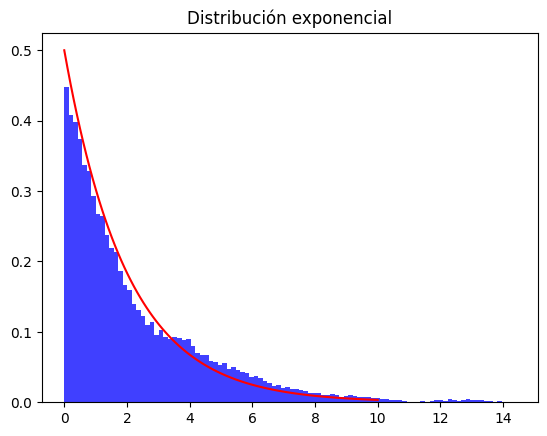

In [111]:
# Histograma
plt.hist(x, density=True, bins=100, color='blue', alpha=0.75)
xs = np.linspace(0, 10, 100)
plt.plot(xs, f(xs, lamda), color='red')
plt.title('Distribución exponencial')

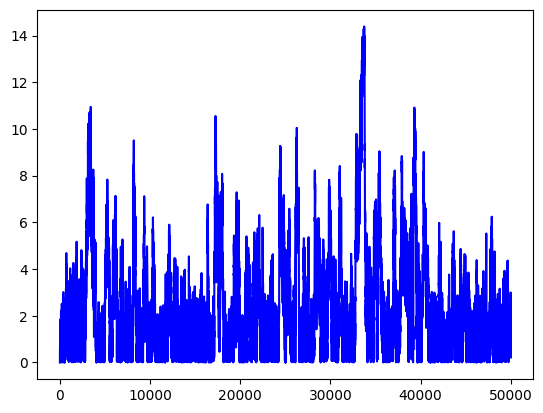

In [112]:
plt.plot(x, color='blue')

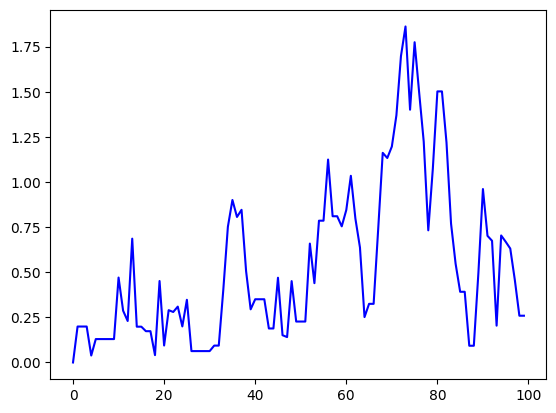

In [113]:
plt.plot(x[:100], color='blue')

#Distribución log-normal

Parámetros $\mu \in \Re$ y $\sigma>0$

Función pdf $\frac{1}{x\sigma\sqrt{2\pi}}exp(-\frac{(lnx-\mu)^2}{2\sigma^2})$

Calculamos la media y varianza con $\mu=1,\sigma=0.5$:

$\mu=exp(\mu+\frac{\sigma^2}{2})=exp(1+\frac{(0.5)^2}{2})≈3.058$

$\sigma=e^{2\mu+\sigma^2}(e^{\sigma^2}-1)=e^{2+(0.5)^2}(e^{(0.5)^2}-1)≈2.69$

In [114]:
def f(x,mu,sigma):
  return np.where(x >= 0, (1/(x*sigma*np.sqrt(2*np.pi)))*np.exp(-((np.log(x)-mu)**2)/(2*sigma**2)), 0) #pdf

In [115]:
# Parametros
mu = 1
sigma = 0.5

In [116]:
delta = 0.5

In [117]:
n = 50000  # n tiene que ser muy grande
x = np.zeros(n)
x[0] = 1  # 1 porque la distribucion tiene soporte en valores >0
acept = 0

for i in range(0, n-1):
    y = x[i] + np.random.uniform(-delta, delta)
    if y > 0:  # Solo aceptar valores no negativos
        if np.random.rand() < min(1, f(y, mu, sigma) / f(x[i], mu, sigma)):
            x[i+1] = y
            acept += 1
        else:
            x[i+1] = x[i]
    else:
        x[i+1] = x[i]
print("La aceptacion fue del", acept / n * 100, "%")

La aceptacion fue del 91.886 %


In [118]:
print(np.mean(x))
print(np.std(x))

3.1389610625645448
1.5712289140713798


Text(0.5, 1.0, 'Distribución log-normal')

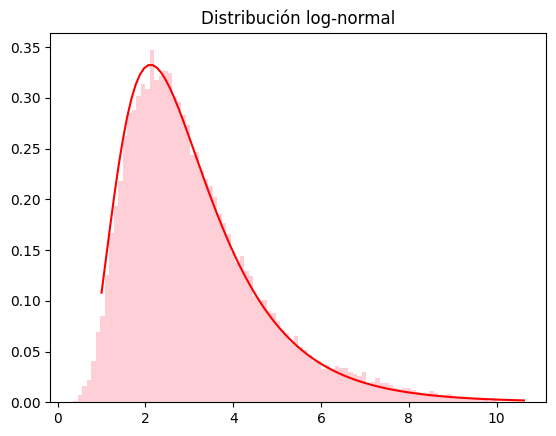

In [123]:
# Histograma
plt.hist(x, density=True, bins=100, color='pink', alpha=0.75)
xs = np.linspace(1, np.max(x), 100)
plt.plot(xs, f(xs, mu, sigma), color='red')
plt.title('Distribución log-normal')

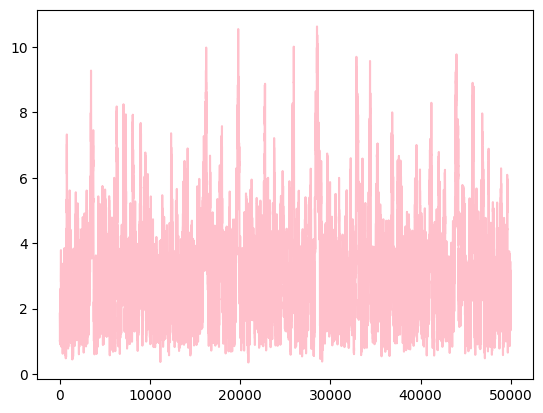

In [120]:
plt.plot(x, color='pink')

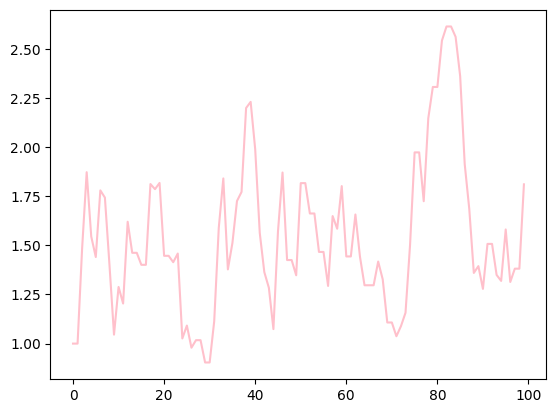

In [121]:
plt.plot(x[:100], color='pink')